<a href="https://colab.research.google.com/github/nguyenduychinh/AI_24_02_23/blob/main/btvn_ai_31_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar100 
(x_train,y_train),(x_test,y_test)= cifar100.load_data()
print(x_train.shape)

169001437/169001437 [==============================] - 3s 0us/step
(50000, 32, 32, 3)


Số máy là: [[[115  86  70]
  [ 96  69  53]
  [226 203 171]
  ...
  [178 155 123]
  [ 97  74  43]
  [183 162 131]]

 [[146 108  92]
  [ 65  37  24]
  [195 176 143]
  ...
  [175 158 130]
  [143 121  91]
  [124  96  61]]

 [[109  72  59]
  [ 60  34  25]
  [150 133 107]
  ...
  [240 228 206]
  [237 220 192]
  [172 146 112]]

 ...

 [[225 208 167]
  [226 209 169]
  [229 212 171]
  ...
  [ 38  31  28]
  [ 64  59  57]
  [ 27  17  12]]

 [[237 223 181]
  [236 222 181]
  [237 223 182]
  ...
  [ 36  30  22]
  [ 63  62  58]
  [ 30  26  19]]

 [[242 231 188]
  [240 229 186]
  [241 229 187]
  ...
  [ 46  34  25]
  [ 59  55  50]
  [ 29  25  20]]]


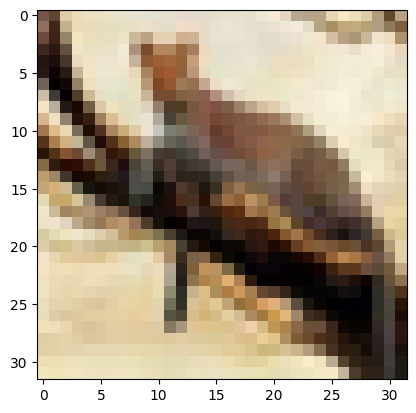

In [ ]:
digit=x_train[6000]
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show
print ("Số máy là:",x_train[6000])

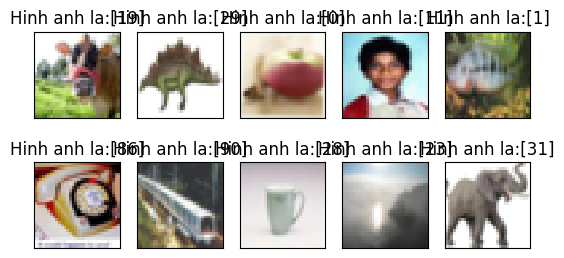

In [ ]:
for i in range(10):
    plt.subplot(3,5,i+1)
    plt.tight_layout
    plt.imshow(x_train[i],cmap='gray',
               interpolation='none')
    plt.title("Hinh anh la:{}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense 
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(100,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 100)               51300     
                                                                 
Total params: 1,624,676
Trainable params: 1,624,676
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = x_train.reshape((50000,32*32*3))  
x_train = x_train.astype('float32')/255   

x_test = x_test.reshape((10000,32*32*3))  
x_test = x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
from keras.utils import to_categorical #lenh chuyen du lieu 
y_train=to_categorical(y_train,100) 
y_test=to_categorical(y_test,100)
print(y_train.shape)

(50000, 100)


In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',  
              metrics=['accuracy']) 
model.fit(x_train,y_train,epochs=20,batch_size=128)   
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Độ mất mát: ',test_loss)
print('Độ chính xác: ',test_acc)

Epoch 1/20
391/391 [==============================] - 9s 23ms/step - loss: 4.2778 - accuracy: 0.0679
Epoch 2/20
391/391 [==============================] - 9s 22ms/step - loss: 3.8121 - accuracy: 0.1232
Epoch 3/20
391/391 [==============================] - 8s 20ms/step - loss: 3.6698 - accuracy: 0.1511
Epoch 4/20
391/391 [==============================] - 9s 22ms/step - loss: 3.5725 - accuracy: 0.1660
Epoch 5/20
391/391 [==============================] - 9s 22ms/step - loss: 3.5019 - accuracy: 0.1794
Epoch 6/20
391/391 [==============================] - 8s 21ms/step - loss: 3.4440 - accuracy: 0.1889
Epoch 7/20
391/391 [==============================] - 9s 24ms/step - loss: 3.3981 - accuracy: 0.1977
Epoch 8/20
391/391 [==============================] - 9s 22ms/step - loss: 3.3591 - accuracy: 0.2048
Epoch 9/20
391/391 [==============================] - 9s 22ms/step - loss: 3.3228 - accuracy: 0.2128
Epoch 10/20
391/391 [==============================] - 8s 20ms/step - loss: 3.2910 - accura

In [ ]:
import numpy as np
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
img = load_img('/content/voi.jpg',target_size=(32,32))
img=img_to_array(img)
img=img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 72ms/step


array([17])